In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv(r"C:\Users\Alejandro Navas\Downloads\ratings.csv")

In [116]:
df.head(5)

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


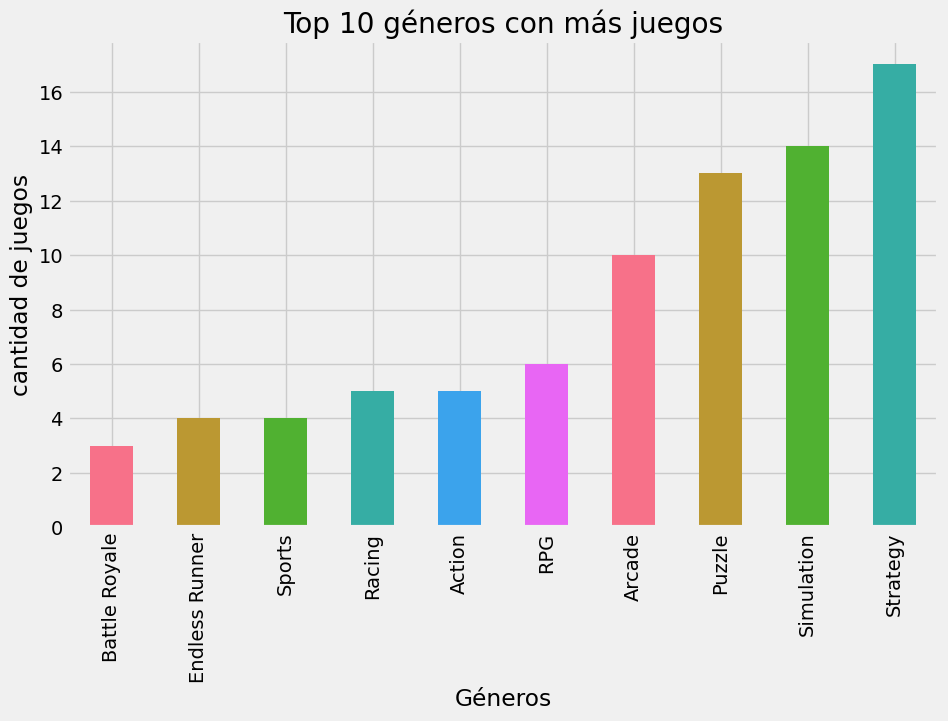

In [117]:
color = sns.color_palette('husl')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
df.Genre.value_counts().head(10).sort_values().plot(kind='bar',color=color,title='Top 10 géneros con más juegos',xlabel='Géneros',ylabel='cantidad de juegos')
plt.show()

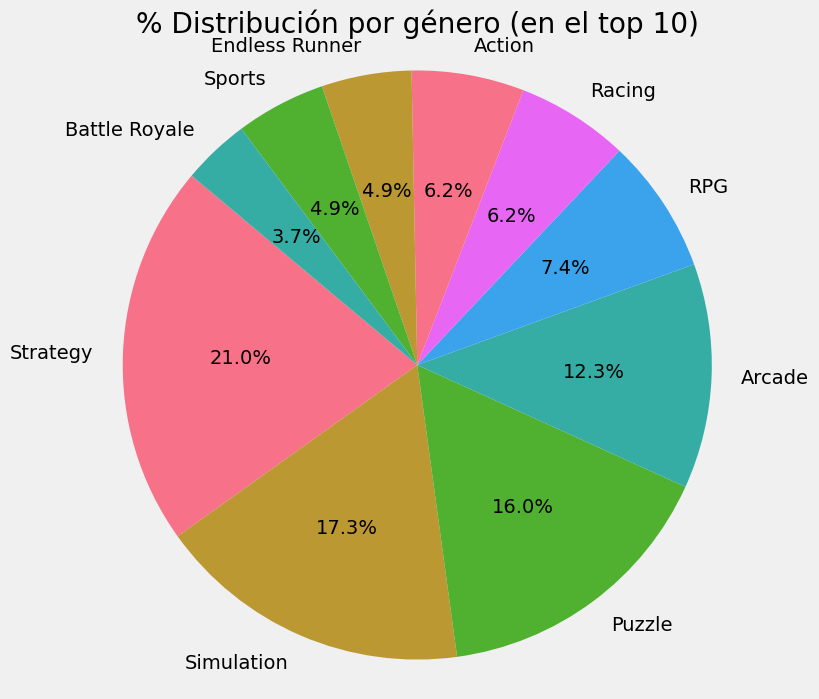

In [83]:
pastel = df.Genre.value_counts().head(10)
plt.figure(figsize=(8, 8))
color = sns.color_palette('husl')
plt.pie(pastel, labels=pastel.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.title('% Distribución por género (en el top 10)')
plt.axis('equal')
plt.show()

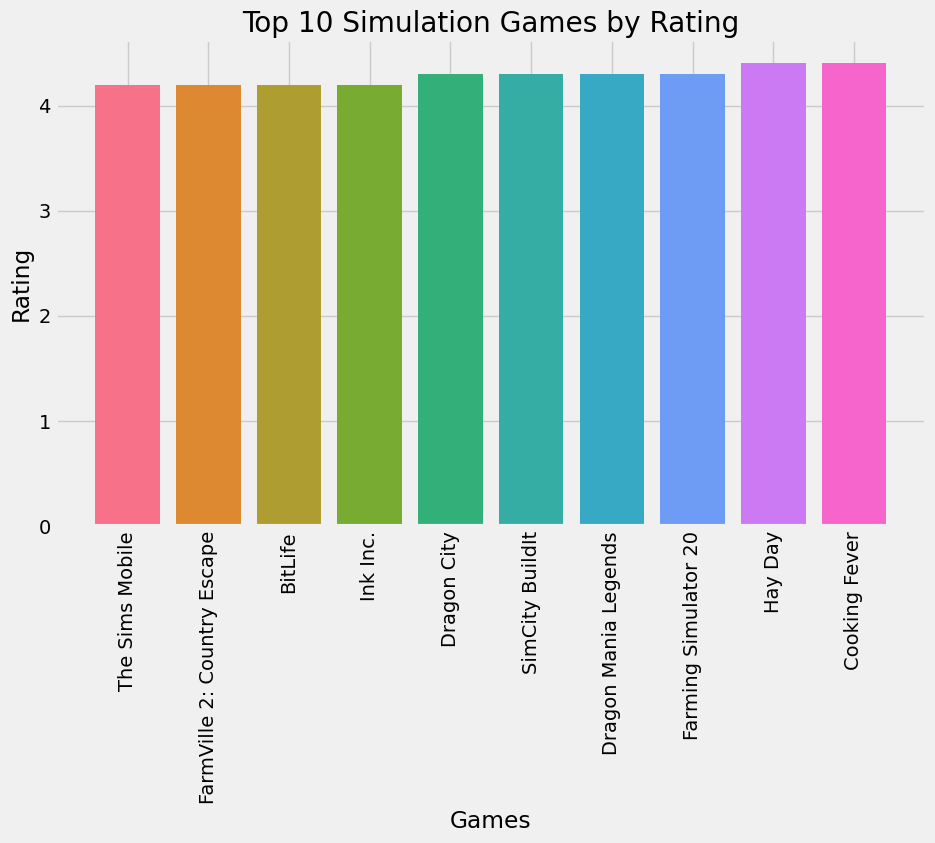

In [153]:
df_sm = df[df.Genre == 'Simulation']
simulation = df_sm.sort_values(by='Rating').head(10)
plt.figure(figsize=(10,6))
plt.bar(simulation['Game Name'],simulation['Rating'], color = color)
plt.title('Top 10 Simulation Games by Rating')
plt.xlabel('Games')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

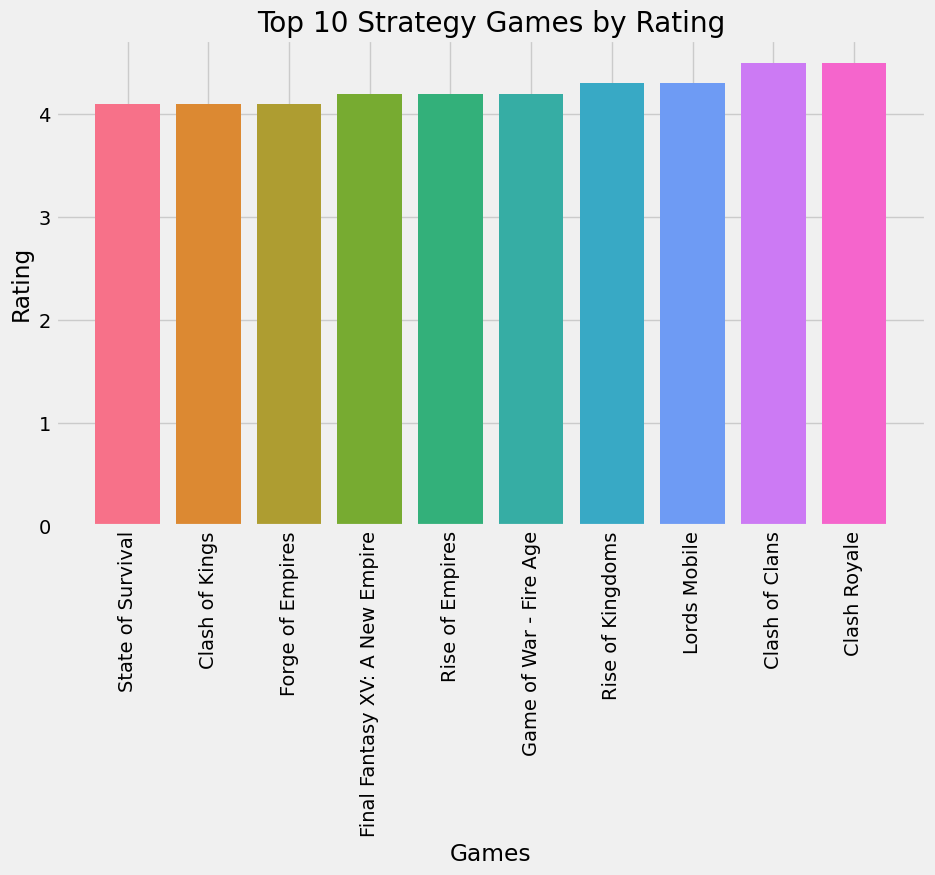

In [151]:
strategy = df[df.Genre == 'Strategy'].head(10).sort_values(by='Rating')
plt.figure(figsize=(10,6))
plt.bar(strategy['Game Name'],strategy['Rating'],color = color)
plt.xticks(rotation=90)
plt.title('Top 10 Strategy Games by Rating')
plt.xlabel('Games')
plt.ylabel('Rating')
plt.show()

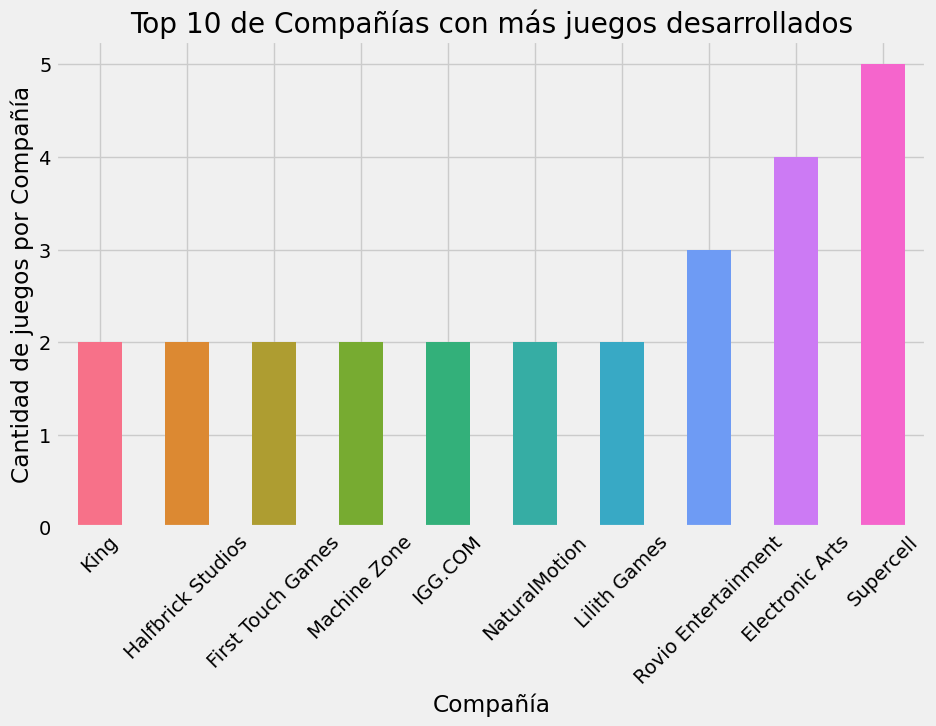

In [148]:
desarrolladores = df['Developer'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
color = sns.color_palette('husl', len(desarrolladores))
desarrolladores.plot(kind='bar', color=color)
plt.xlabel('Compañía')
plt.ylabel('Cantidad de juegos por Compañía')
plt.title('Top 10 de Compañías con más juegos desarrollados')
plt.xticks(rotation=45)
plt.show()

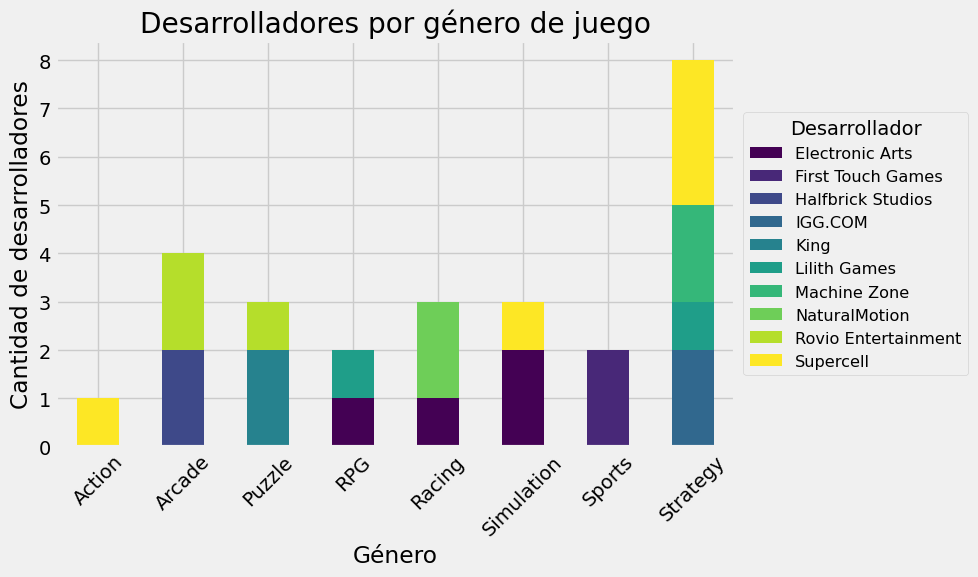

In [195]:
developers_list = ['King', 'Halfbrick Studios', 'First Touch Games', 'Machine Zone', 'IGG.COM', 'NaturalMotion', 'Lilith Games', 'Rovio Entertainment', 'Electronic Arts', 'Supercell']
filtered_df = df[df['Developer'].isin(developers_list)]
filtered_df.groupby('Genre')['Developer'].value_counts()
grouped_data = filtered_df.groupby(['Genre', 'Developer']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

plt.title('Desarrolladores por género de juego')
plt.xlabel('Género')
plt.ylabel('Cantidad de desarrolladores')
plt.xticks(rotation=45)
plt.legend(title='Desarrollador', fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()